In [1]:
# from dataset_coroutine import dataset_coroutine
# from build_image_hist import get_color_histograms_of_images, color_hist_to_2d
# from assign_labels import load_reducer, assign_labels
# from draw_clusters import draw_clusters

In [2]:
link_1 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/'
         
link_2 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (1)/участок на 4 речке'
         
link_3 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' + \
         '2021 год, Южно-Камчатский заказник, Охотоморское побережье (2)/'

link_4 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год лето, Южно-Камчатский заказник, Охотоморское побережье/1 km'
         
link_5 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'от 1 речки в сторону поселка'

link_6 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         '2023 год осень, сопредельная с Южно-Камчатским заказником территория, Охотоморское побережье/' +\
         'участок ближе к поселку'
         
link_7 = '/home/jupyter/datasphere/s3/garbage-data/drone-photo/' +\
         'P010_Okhotskoe_more_19_07_2020/' +\
         'Photo'

In [3]:
import numpy as np
from dataset_coroutine import dataset_coroutine

data_cor = dataset_coroutine(
    [link_1, link_2, link_3, link_4, link_5, link_6, link_7], 
    each_n=30000,
    total_n=np.inf
)

In [ ]:
from assign_labels import load_reducer
reducer = load_reducer()

Unknown instance spec: 

In [6]:
import os
from generate_stargan_dataset import make_stargandataset_dir, generage_stargan_dataset

batch_size = 5000
datasets_path='/home/jupyter/datasphere/project/STARGAN'
stargan_dataset_path = os.path.join(datasets_path, 'stargan_dataset')

make_stargandataset_dir(datasets_path=datasets_path, del_prev=False)
generage_stargan_dataset(reducer, data_cor, 
                         batch_size=batch_size, 
                         stargan_dataset_path=stargan_dataset_path)

5001 images was saved: 49s
10001 images was saved: 50s
15001 images was saved: 50s
20001 images was saved: 52s
25001 images was saved: 54s
odc_number:  30000
30001 images was saved: 55s
35001 images was saved: 56s
40001 images was saved: 55s
45001 images was saved: 52s
50001 images was saved: 54s
55001 images was saved: 55s
odc_number:  30000
60001 images was saved: 55s
65001 images was saved: 53s
70001 images was saved: 53s
75001 images was saved: 54s
80001 images was saved: 54s
85001 images was saved: 52s
odc_number:  30000
90001 images was saved: 54s
95001 images was saved: 60s
100001 images was saved: 61s
odc_number:  11220
105001 images was saved: 54s
110001 images was saved: 52s
115001 images was saved: 53s
odc_number:  16758
120001 images was saved: 55s
125001 images was saved: 53s
130001 images was saved: 57s
135001 images was saved: 55s
140001 images was saved: 55s
145001 images was saved: 56s
odc_number:  30000
150001 images was saved: 56s
155001 images was saved: 55s
160001 

StopIteration: 177978

1:  11199


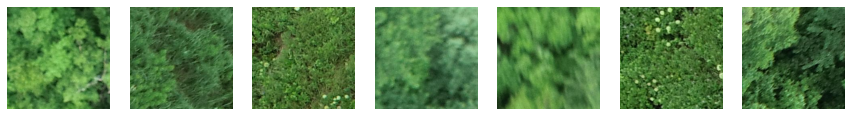

2:  7009


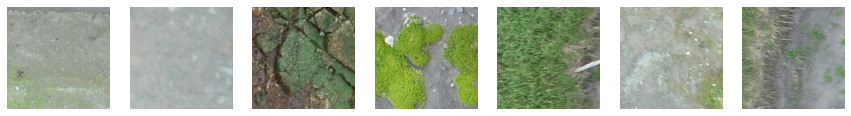

3:  4740


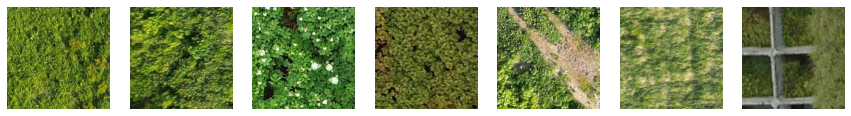

4:  2364


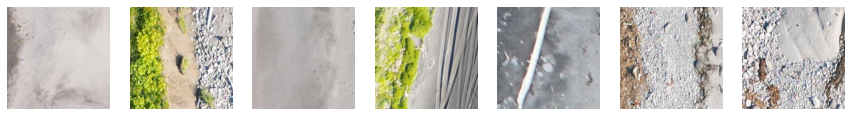

5:  3068


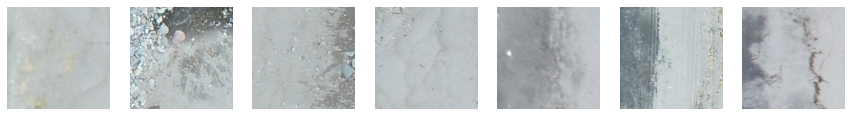

6:  9889


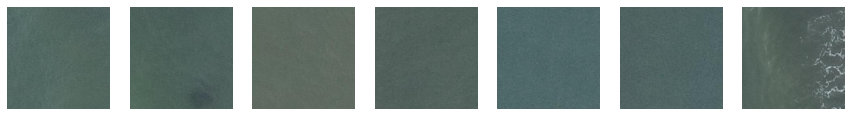

7:  16738


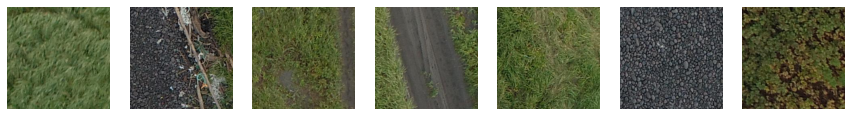

8:  11046


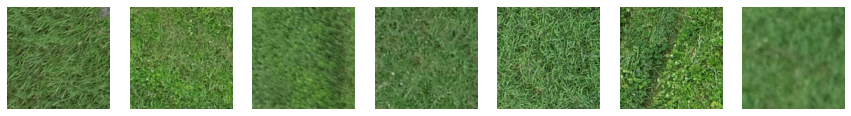

9:  38823


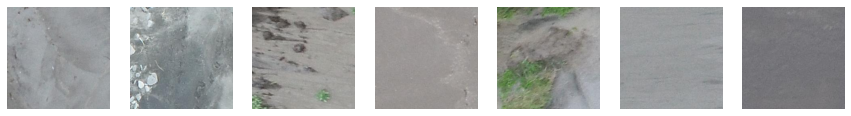

10:  21539


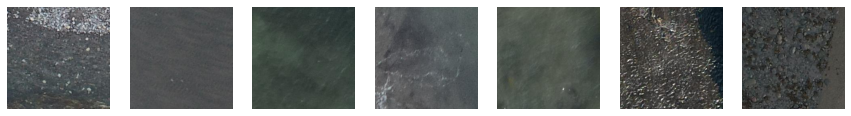

11:  48589


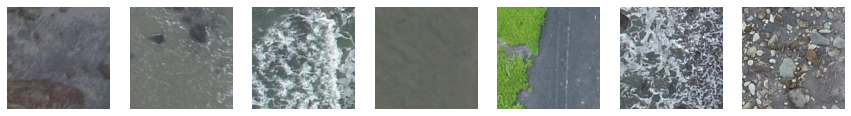

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
ncols = 7

for i in range(1, 12):
    class_path = os.path.join(stargan_dataset_path, f'class_{i}')
    list_dir = os.listdir(class_path)
    names = np.random.choice(list_dir, ncols)
    print(f'{i}: ', len(list_dir))
    
    fig, axes = plt.subplots(ncols=ncols, figsize=(15, 2))
    for i, name in enumerate(names):
        img = Image.open(os.path.join(class_path, name)).convert('RGB')
        img = np.asarray(img)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()